In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
df = pd.read_csv('purchase.csv')
df

,Age,Income,Gender,Marital_Status,Purchased
0,25,30000,Male,Single,No
1,45,60000,Female,Married,Yes
2,35,50000,Male,Married,No
3,50,80000,Female,Single,Yes
4,23,25000,Female,Single,No
5,40,70000,Male,Married,Yes
6,33,45000,Female,Married,No
7,55,90000,Male,Single,Yes


In [3]:
# Assuming the dataset has features and a target column named 'Purchased'
X = df.drop(columns=['Purchased'])  # Features
y = df['Purchased']  # Target variable

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}  # Store encoders for each categorical column
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Save encoders for later use

# Now continue with train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# --- K-Nearest Neighbors (KNN) ---
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)

In [9]:
# --- Naïve Bayes ---
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred_nb)

In [10]:
# --- Random Forest Classifier ---
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, y_pred_rfc)

In [11]:
# --- Compare Models ---
models = ['KNN', 'Naïve Bayes', 'Random Forest']
accuracy_scores = [knn_acc, nb_acc, rfc_acc]

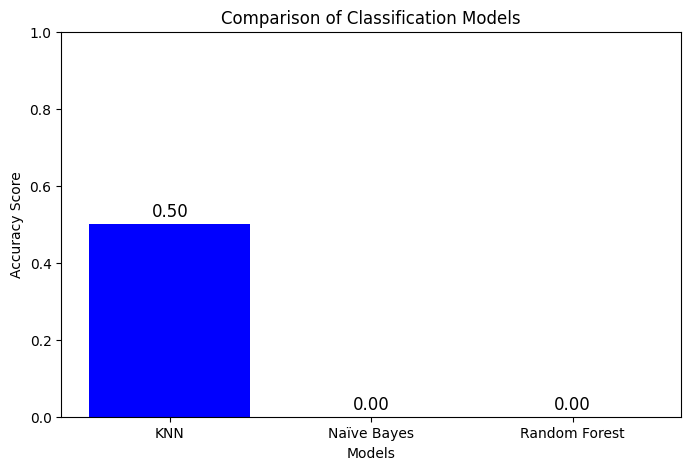

In [12]:
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_scores, color=['blue', 'red', 'green'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Classification Models")
plt.ylim(0, 1)
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

In [13]:
# Print Accuracy Scores
print("KNN Accuracy:", knn_acc)
print("Naïve Bayes Accuracy:", nb_acc)
print("Random Forest Accuracy:", rfc_acc)

KNN Accuracy: 0.5
Naïve Bayes Accuracy: 0.0
Random Forest Accuracy: 0.0


In [14]:
# Best Model
best_model = models[np.argmax(accuracy_scores)]
print("Best Model:", best_model)


Best Model: KNN
